# Prédiction_avec_RandomForestClassifier

##### Chargement des bibliothèques

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


##### Chargement de données

In [2]:
df = pd.read_parquet("C:/Users/lisas/Downloads/df_final_15min_NoNan_20250505.parquet")
df["heure_arrondie"] = pd.to_datetime(df["heure_arrondie"])
df = df.sort_values("heure_arrondie")

In [8]:
df.head()

,nom_du_troncon,heure_arrondie,id_technique,id,debit,longueur,taux_occupation,code_couleur,etat_du_trafic,temps_de_parcours,...,etat_indice,geom_type,geom_coordinates,geo_point_2d_lon,geo_point_2d_lat,has_event_near_troncon,weekday,hour,minute,troncon_enc
0,3 Continents I,2025-02-16 20:15:00,5149-2025-02-16T20:15:00,5149,240.0,478.0,2.9,3.0,Fluide,85.0,...,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,6,20,15,0
366606,Carnot P1,2025-02-16 20:15:00,5795-2025-02-16T20:15:00,5795,480.0,235.0,8.3,3.0,Fluide,53.0,...,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,6,20,15,146
1514133,Riviere I2,2025-02-16 20:15:00,1021-2025-02-16T20:15:00,1021,240.0,349.0,2.5,3.0,Fluide,65.0,...,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,6,20,15,603
434403,Clisson I6,2025-02-16 20:15:00,1124-2025-02-16T20:15:00,1124,240.0,442.0,2.5,3.0,Fluide,77.0,...,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,6,20,15,173
1446336,Ranzay P,2025-02-16 20:15:00,806-2025-02-16T20:15:00,806,60.0,775.0,0.8,3.0,Fluide,173.0,...,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,6,20,15,576


##### Division temporelle 80/20

In [ ]:
df_train = df[df["heure_arrondie"] <= "2025-03-07"]
df_test = df[df["heure_arrondie"] >= "2025-03-08"]

In [10]:
print(df_train.shape)
print(df_test.shape)

(1306256, 57)
(503328, 57)


##### Encodage de la variable catégorielle 'nom_du_troncon'


In [13]:
from sklearn.preprocessing import LabelEncoder
troncon_encoder = LabelEncoder()
df_train["troncon_enc"] = troncon_encoder.fit_transform(df_train["nom_du_troncon"])
df_test["troncon_enc"] = troncon_encoder.transform(df_test["nom_du_troncon"])


C:\Users\lisas\AppData\Local\Temp\ipykernel_31048\4109484375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["troncon_enc"] = troncon_encoder.fit_transform(df_train["nom_du_troncon"])
C:\Users\lisas\AppData\Local\Temp\ipykernel_31048\4109484375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["troncon_enc"] = troncon_encoder.transform(df_test["nom_du_troncon"])


##### Variables sélectionnées (excluant variables temporelles directes et météo)

In [14]:
features = [
    "troncon_enc", "longueur", "minute", "hour", "jour", "weekday",
    "has_event_near_troncon", "is_vacances", "is_ferie"
]

##### X_train et X_test

In [15]:
X_train = df_train[features]
y_train = df_train["etat_du_trafic"]
X_test = df_test[features]
y_test = df_test["etat_du_trafic"]

##### Encodage des variables cibles

In [16]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


In [26]:
# Encodage de 'jour'
jour_encoder = LabelEncoder()
df_train["jour"] = jour_encoder.fit_transform(df_train["jour"])
df_test["jour"] = jour_encoder.transform(df_test["jour"])


C:\Users\lisas\AppData\Local\Temp\ipykernel_31048\701008690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["jour"] = jour_encoder.fit_transform(df_train["jour"])
C:\Users\lisas\AppData\Local\Temp\ipykernel_31048\701008690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["jour"] = jour_encoder.transform(df_test["jour"])


In [29]:
X_train = df_train[features]
X_test = df_test[features]


In [39]:
y_train.value_counts(normalize=True)

etat_du_trafic
Fluide    0.976556
Dense     0.011705
Bloqué    0.006534
Saturé    0.005205
Name: proportion, dtype: float64

In [30]:
print(X_train.dtypes)


troncon_enc                 int64
longueur                  float64
minute                      int32
hour                        int32
jour                        int64
weekday                     int32
has_event_near_troncon       bool
is_vacances                 int64
is_ferie                    int64
dtype: object


##### Normalisation

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Entraînement d'un RandomForestClassifier

In [32]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train_enc)

RandomForestClassifier(random_state=42)

##### Prédictions

In [33]:
y_pred = clf.predict(X_test_scaled)

##### Évaluation

In [38]:
print(y_test_enc)

[2 2 2 ... 2 2 2]


In [34]:

print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

      Bloqué       0.29      0.27      0.28      3273
       Dense       0.18      0.15      0.17      5392
      Fluide       0.99      0.99      0.99    492090
      Saturé       0.14      0.11      0.12      2573

    accuracy                           0.97    503328
   macro avg       0.40      0.38      0.39    503328
weighted avg       0.97      0.97      0.97    503328



🔍 Analyse

Répartition des classes

"Fluide" représente 97.7 % des données — donc le modèle peut atteindre une accuracy de 97 % simplement en prédiction constante sur cette classe.

Les classes minoritaires (Bloqué, Dense, Saturé) sont quasiment ignorées : les f1-scores sont très bas (≈ 0.1 à 0.28), ce qui indique que le modèle ne les apprend pas bien.



##### Matrice de confusion

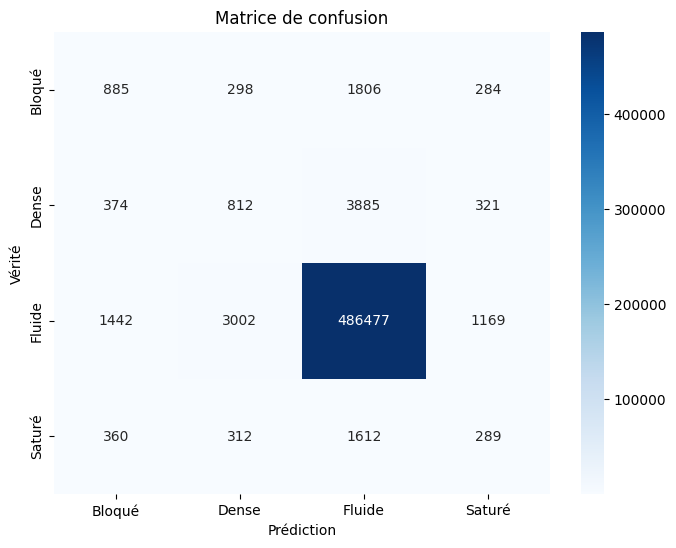

In [35]:
conf_matrix = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Prédiction")
plt.ylabel("Vérité")
plt.title("Matrice de confusion")
plt.show()


##### Analyse des features importantes

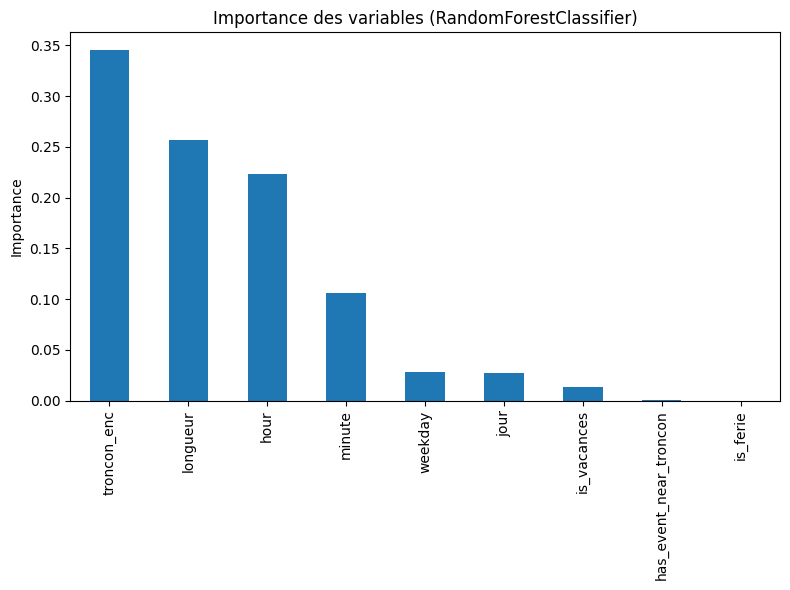

In [36]:
importances = pd.Series(clf.feature_importances_, index=features)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
importances_sorted.plot(kind='bar')
plt.title("Importance des variables (RandomForestClassifier)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Conclu que:

Le modèle est biaisé vers la classe majoritaire (fluide), car il n'a pas assez de données représentatives pour les classes rares.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Division temporelle
df_train = df[df["heure_arrondie"] <= "2025-03-07"]
df_test = df[df["heure_arrondie"] >= "2025-03-08"]

In [4]:
from sklearn.preprocessing import LabelEncoder
troncon_encoder = LabelEncoder()
df_train["troncon_enc"] = troncon_encoder.fit_transform(df_train["nom_du_troncon"])
df_test["troncon_enc"] = troncon_encoder.transform(df_test["nom_du_troncon"])


C:\Users\lisas\AppData\Local\Temp\ipykernel_13460\4109484375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["troncon_enc"] = troncon_encoder.fit_transform(df_train["nom_du_troncon"])
C:\Users\lisas\AppData\Local\Temp\ipykernel_13460\4109484375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["troncon_enc"] = troncon_encoder.transform(df_test["nom_du_troncon"])


In [5]:
# Encodage du jour
jour_encoder = LabelEncoder()
df_train["jour"] = jour_encoder.fit_transform(df_train["jour"])
df_test["jour"] = jour_encoder.transform(df_test["jour"])

C:\Users\lisas\AppData\Local\Temp\ipykernel_13460\3691342001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["jour"] = jour_encoder.fit_transform(df_train["jour"])
C:\Users\lisas\AppData\Local\Temp\ipykernel_13460\3691342001.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["jour"] = jour_encoder.transform(df_test["jour"])


In [6]:
# Features sélectionnées
features = [
    "troncon_enc", "longueur", "minute", "hour", "jour", "weekday",
    "has_event_near_troncon", "is_vacances", "is_ferie"
]

In [7]:
X_train = df_train[features]
X_test = df_test[features]
y_train = df_train["etat_du_trafic"]
y_test = df_test["etat_du_trafic"]

In [8]:
# Encodage des cibles
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [9]:
# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Modèle avec class_weight équilibré
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
clf.fit(X_train_scaled, y_train_enc)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [12]:
# Prédictions
y_pred = clf.predict(X_test_scaled)

In [13]:
# Évaluation
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

      Bloqué       0.22      0.36      0.28      3273
       Dense       0.14      0.22      0.17      5392
      Fluide       0.99      0.97      0.98    492090
      Saturé       0.11      0.19      0.14      2573

    accuracy                           0.96    503328
   macro avg       0.37      0.44      0.39    503328
weighted avg       0.97      0.96      0.96    503328



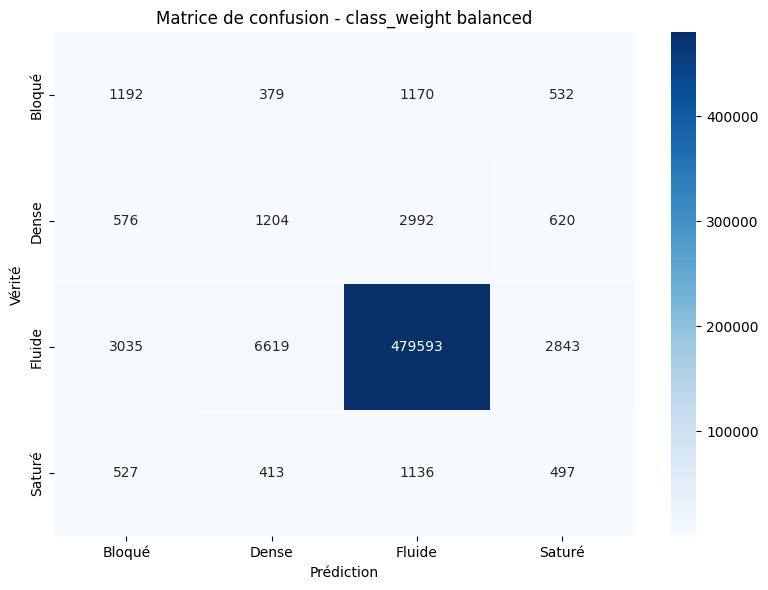

In [14]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Prédiction")
plt.ylabel("Vérité")
plt.title("Matrice de confusion - class_weight balanced")
plt.tight_layout()
plt.show()


Le déséquilibre est trop extrême (97.6 % de "Fluide"), donc class_weight="balanced" ne suffit pas.

Installation  imbalanced si nécessaire, avec :
 pip install imbalanced-learn


Distribution après SMOTE :
2    1275632
0    1275632
1    1275632
3    1275632
Name: count, dtype: int64
              precision    recall  f1-score   support

      Bloqué       0.24      0.33      0.28      3273
       Dense       0.16      0.21      0.18      5392
      Fluide       0.99      0.98      0.98    492090
      Saturé       0.11      0.14      0.12      2573

    accuracy                           0.96    503328
   macro avg       0.37      0.42      0.39    503328
weighted avg       0.97      0.96      0.97    503328



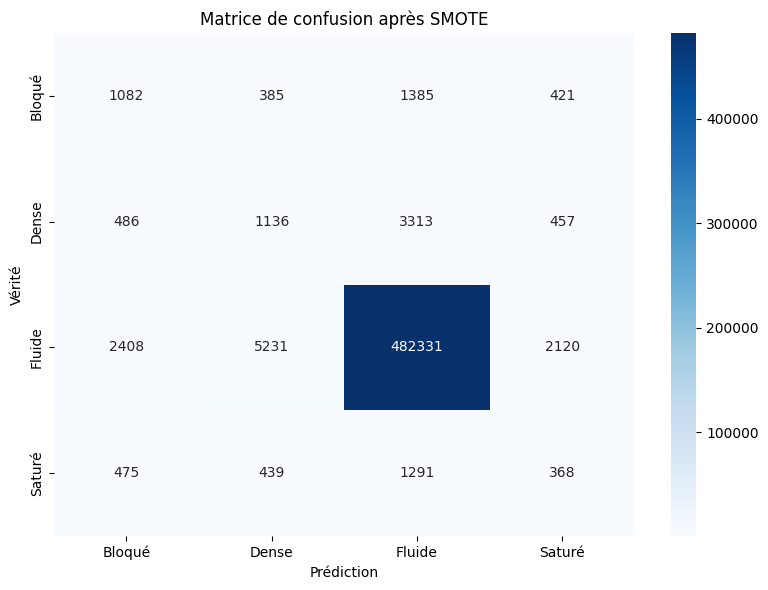

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Encodage des labels (si pas déjà fait)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Application de SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train_enc)

print("Distribution après SMOTE :")
print(pd.Series(y_resampled).value_counts())

# Entraînement avec les données rééquilibrées
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_resampled, y_resampled)

# Prédiction et évaluation
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Prédiction")
plt.ylabel("Vérité")
plt.title("Matrice de confusion après SMOTE")
plt.tight_layout()
plt.show()


##### Risques et limitations de SMOTE
1. Génération de données irréalistes
2.  Overfitting :
SMOTE augmente artificiellement le nombre d’échantillons minoritaires. 
3. Pas adapté aux données catégorielles :
SMOTE suppose que les données sont continues. Sur des variables catégorielles (comme weekday, jour encodés arbitrairement), l’interpolation n’a pas de sens.